In [1]:
import numpy
import matplotlib.pyplot as plt
from numpy.random import random

In [2]:
import tensorflow as tf
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
range(10)

range(0, 10)

In [3]:
import tensorflow as tf
import tf.keras

ImportError: No module named 'tf'

In [6]:
%%cython -a
import numpy as np
cimport numpy as np
from numpy.random import random

def power_spectrum( double E0, double beta, double kmin = 1.0, int Nx = 1024):
    cdef np.ndarray[ np.float64_t, ndim = 1] k
    return lambda k: ( (k / kmin)**-beta ) * ( - 1.0 + beta)/ kmin

def get_real_space_signal(double beta, int Nx = 1024, int Nbins = 128 ):
    
    
    cdef double Pk_, phi
    cdef double pi      = 3.14159
    cdef int k
    cdef double[:] x    = np.linspace(0, 1, Nx)
    cdef double[:] bins = np.linspace( -1.0, 1.0, Nbins + 1)
    cdef double[:] kx   = np.linspace(0, 2.0*pi * Nx, Nx)
    cdef double[:] Vx   = np.zeros((len(Nx)))
    cdef int[:] count
    kmin = kx[1]
    
    Pk = power_spectrum(1.0 , beta, kmin=kmin)
    
    for k_ in kx[1:]:
        Pk_ = Pk( k_ )
        Vk_ = np.sqrt( Pk_)
        phi = 2.0 * np.pi * random(1)
        ans = Vk_ * np.cos( k_ * x + phi  )   
#         ans -= numpy.mean(ans)
#         plt.plot( x, ans )
        Vx += ans.real
#     plt.show()
    Vx -= np.mean(Vx)
    count, _ = np.histogram(Vx, bins=bins)
#     print( "range of Vx: min = {}, max = {} with beta = {}".format(min(Vx), max(Vx), beta )  )
    return Vx, count

In [3]:
def power_spectrum( E0, beta, kmin = 1.0, Nx = 1024):
    return lambda k: ( (k / kmin)**-beta ) * ( - 1.0 + beta)/ kmin


def get_real_space_signal( beta,  Nx = 1024,  Nbins = 128 ):
    x    = np.linspace(0, 1, Nx)
    bins = np.linspace( -1.0, 1.0, Nbins + 1)
    kx =  x * Nx * 2.0*np.pi
    kmin = kx[1]
    Vx = np.zeros((len(x)))
    
    Pk = power_spectrum(1.0 , beta, kmin=kmin)
    
    for k_ in kx[1:]:
        Pk_ = Pk( k_ )
        Vk_ = np.sqrt( Pk_)
        phi = 2.0 * np.pi * random(1)
        ans = Vk_ * np.cos( k_ * x + phi  )   
#         ans -= numpy.mean(ans)
#         plt.plot( x, ans )
        Vx += ans.real
#     plt.show()
    Vx -= np.mean(Vx)
    count, _ = np.histogram(Vx, bins=bins)
#     print( "range of Vx: min = {}, max = {} with beta = {}".format(min(Vx), max(Vx), beta )  )
    return Vx, count

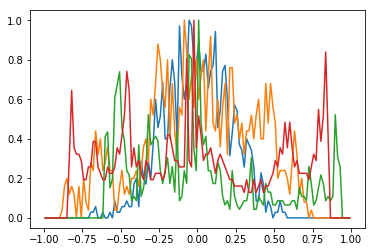

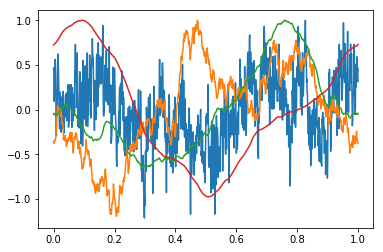

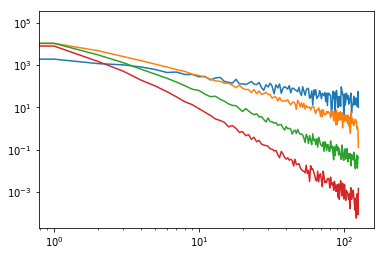

In [5]:
import numpy as np
Vx_b = []
count_b = []
Nbeta = 4
bins = np.linspace( -1.0, 1.0, 128 + 1)
x    = np.linspace(0, 1, 1024)
beta_b = numpy.linspace( 1.1, 4, Nbeta )
for b in beta_b:
    Vx, count = get_real_space_signal( b )
    Vx_b.append(Vx)
    count_b.append(count)

for i in range(Nbeta):
    plt.plot( (bins[1:] + bins[:-1] ) /2.0, count_b[i] / max(count_b[i]), label ="{}".format(beta_b[i]) )
# plt.legend()
plt.show()

for i in range(Nbeta):
    plt.plot(x, Vx_b[i] / max(Vx_b[i]), label = "{}".format(beta_b[i]) )
# plt.legend()
plt.show()

for i in range(Nbeta):
    plt.loglog( range(127), numpy.abs( numpy.fft.fft( Vx_b[i] )**2.0 )[1:128] )
# plt.legend()
plt.show()
#     plt.loglog( range(500), 1.0e5 * numpy.arange(500)**-beta_b[i] )

In [6]:
all_beta = numpy.load('all_beta.npy')
all_count = numpy.load('all_count.npy')

In [236]:
all_count = []
all_beta  = []
Nsample = 16384

for i in range(Nsample):
    
    # beta is in the range of 1.0 - 4.0
    beta = 3.0*random(1) + 1.1
    
    _, count = get_real_space_signal( beta)
    all_count.append(count)
    all_beta.append(beta)
    if (i % 1024 == 0):
        print(i)
all_beta = numpy.array(all_beta)
all_count = numpy.array(all_count)

0
1024
2048
3072
4096
5120
6144
7168
8192
9216
10240
11264
12288
13312
14336
15360


In [11]:
# numpy.save("all_beta.npy", all_beta )
# numpy.save("all_count.npy", all_count )

NameError: name 'all_beta' is not defined

In [14]:
all_beta.min()

1.100298343426973

In [31]:
sub_X, sub_y = get_batch( all_count, all_beta, batch_size = 1 )
print(sub_X.shape, sub_y.shape)
plt.plot(sub_X[0,:])

IndexError: too many indices for array

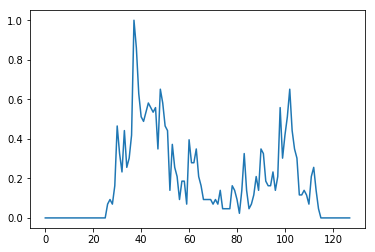

In [36]:
all_count

array('all_count.npy', dtype='<U13')

(1, 128, 1) (1, 1)


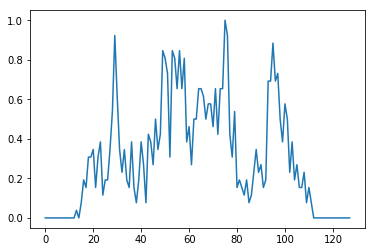

In [10]:
sub_X, sub_y = get_batch( all_count, all_beta, batch_size = 1 )
print(sub_X.shape, sub_y.shape)
plt.plot(sub_X[0,:])

In [7]:
def get_batch( X, y, batch_size = 128 ):
    
    a   = numpy.arange(len(y))
    numpy.random.shuffle(a)

    batch_x = X[a[:batch_size]]
    batch_y = y[a[:batch_size]]

    batch_x = numpy.array(batch_x, dtype=numpy.float32)
    batch_y = numpy.array(batch_y, dtype=numpy.float32)

    for i in range(batch_size):
        batch_x[i] = batch_x[i]/ batch_x[i].max()
    
    
    return batch_x[:,:,None], batch_y

In [13]:
# Parameters
# Network Parameters
num_input = 128 # MNIST data input (img shape: 28*28)
num_classes = 1 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

learning_rate = 1.0e-2
num_steps = 50000
batch_size = 4096
display_step = 1000

# Network Parameters
n_hidden_1 = 16  # 1st layer number of neurons
n_hidden_2 = 8
n_hidden_3 = 1
# 2nd layer number of neurons
num_input = 128 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_output])

In [14]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [8]:
# Parameters
# Network Parameters
num_input = 128 # MNIST data input (img shape: 28*28)
num_classes = 1 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)

learning_rate = 0.001
momentum      = 0.01
num_steps = 50000
batch_size = 4096
display_step = 1000

# Network Parameters
n_hidden_1 = 16  # 1st layer number of neurons
n_hidden_2 = 8
n_hidden_3 = 1
# 2nd layer number of neurons
num_input = 128 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input, 1])
Y = tf.placeholder("float", [None, num_output])

win_size = 16

pool_size = 64
filter_depth = 16
filter_matrix = tf.random_normal([win_size , filter_depth, 1 ])

size_after_conv1d = num_input - win_size + 1
size_pooling_layer = size_after_conv1d - pool_size + 1

weights = {
    'h1': tf.Variable(tf.random_normal([ size_pooling_layer , n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [19]:
print(X.shape, filter_matrix.shape)
conv1d_1 =   tf.nn.conv1d(X, filter_matrix, padding= "VALID", stride = 1)
print(conv1d_1.shape)
conv1d_1 = tf.layers.max_pooling1d(conv1d_1, 32, 1, padding="VALID")
conv1d_1 = tf.contrib.layers.flatten(conv1d_1)
print(conv1d_1.shape)

layer_1 = tf.add(tf.matmul(conv1d_1, weights['h1']), biases['b1'])
print(weights['h1'].shape)
layer_1 = tf.nn.relu(layer_1)
print(layer_1.shape)

(?, 128) (16, 1, 1)


ValueError: Shape must be rank 4 but is rank 3 for 'conv1d_1/Conv2D' (op: 'Conv2D') with input shapes: [?,1,128], [1,16,1,1].

In [10]:
conv1d_1 =   tf.nn.conv1d(X, filter_matrix, padding= "VALID", stride = 1)
print(conv1d_1.shape)
conv1d_1 = tf.layers.max_pooling1d(conv1d_1, 1, 1, padding="VALID")

conv1d_1.shape

(?, 97, 1)


TensorShape([Dimension(None), Dimension(97), Dimension(1)])

In [9]:
# Create model
def conv1d_neural_net(x):
    # Hidden fully connected layer with 256 neurons
    conv1d_1 =   tf.nn.conv1d(x, filter_matrix, padding= "VALID", stride = 1)
#     conv1d_1 = tf.layers.max_pooling1d(conv1d_1, pool_size, 1, padding="VALID")
    conv1d_1 = tf.contrib.layers.flatten(conv1d_1)
    conv1d_1 = tf.nn.relu(conv1d_1)
    
    layer_1 = tf.add(tf.matmul(conv1d_1, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output fully connected layer with a neuron for each class
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    
    # keep the output to within a range of something
    layer_3 = tf.nn.sigmoid(layer_3)
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    
    return out_layer

net = conv1d_neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean( tf.square(Y - net ) )
optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
train_op = optimizer.minimize(loss_op)

accuracy = tf.subtract(Y, net)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [15]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output fully connected layer with a neuron for each class
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    
    # keep the output to within a range of something
    layer_3 = tf.nn.sigmoid(layer_3)
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    
    return out_layer

In [28]:
tf.keras.utils.plot_model(
    loss_op,
    to_file='model.png',
    show_shapes=False
)

AttributeError: 'Tensor' object has no attribute 'layers'

In [16]:
# Construct model
net = neural_net(X)

# net = conv1d_neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean( tf.square(Y - net ) )
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss_op)

accuracy = tf.subtract(Y, net)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

tf.summary.scalar('loss_function', loss_op)

<tf.Tensor 'loss_function:0' shape=() dtype=string>

In [21]:
def get_batch( X, y, batch_size = 128 ):
    
    a   = numpy.arange(len(y))
    numpy.random.shuffle(a)

    batch_x = X[a[:batch_size]]
    batch_y = y[a[:batch_size]]

    batch_x = numpy.array(batch_x, dtype=numpy.float32)
    batch_y = numpy.array(batch_y, dtype=numpy.float32)

    for i in range(batch_size):
        batch_x[i] = batch_x[i]/ batch_x[i].max()
    
    
    return batch_x[:,:,None], batch_y



with tf.Session() as sess:
    summary_writer = tf.summary.FileWriter('./log/', sess.graph)
    # Run the initializer
    sess.run(init)
    
    batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = batch_size)
    # Run optimization op (backprop)
    for step in range(1, 1000):
        s_val = sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, 
                                              keep_prob: dropout})
#         summary_writer.add_summary(s_val, global_step=step) 
    print("Optimization Finished!")
    saver = tf.train.Saver()
    saver.save(sess, "./conv1d_model.ckpt")

Optimization Finished!


UnknownError: Failed to rename: ./conv1d_model.ckpt.data-00000-of-00001.tempstate2508188870201676903 to: ./conv1d_model.ckpt.data-00000-of-00001 : Access is denied.
; Input/output error
	 [[{{node save_1/SaveV2}} = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_1/Const_0_0, save_1/SaveV2/tensor_names, save_1/SaveV2/shape_and_slices, Variable/_7, Variable/Momentum/_9, Variable_1/_11, Variable_1/Momentum/_13, Variable_10/_15, Variable_10/Momentum/_17, Variable_11/_19, Variable_11/Momentum/_21, Variable_12/_23, Variable_12/Momentum/_25, Variable_13/_27, Variable_13/Momentum/_29, Variable_14/_31, Variable_14/Momentum/_33, Variable_15/_35, Variable_15/Momentum/_37, Variable_16/_39, Variable_16/Momentum/_41, Variable_17/_43, Variable_17/Momentum/_45, Variable_18/_47, Variable_18/Momentum/_49, Variable_19/_51, Variable_19/Momentum/_53, Variable_2/_55, Variable_2/Momentum/_57, Variable_20/_59, Variable_20/Momentum/_61, Variable_21/_63, Variable_21/Momentum/_65, Variable_22/_67, Variable_22/Momentum/_69, Variable_23/_71, Variable_23/Momentum/_73, Variable_3/_75, Variable_3/Momentum/_77, Variable_4/_79, Variable_4/Momentum/_81, Variable_5/_83, Variable_5/Momentum/_85, Variable_6/_87, Variable_6/Momentum/_89, Variable_7/_91, Variable_7/Momentum/_93, Variable_8/_95, Variable_8/Momentum/_97, Variable_9/_99, Variable_9/Momentum/_101)]]

Caused by op 'save_1/SaveV2', defined at:
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\IPython\core\interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-cb2c6bcb3b51>", line 32, in <module>
    saver = tf.train.Saver()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 1094, in __init__
    self.build()
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 1106, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 1143, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 784, in _build_internal
    save_tensor = self._AddSaveOps(filename_tensor, saveables)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 284, in _AddSaveOps
    save = self.save_op(filename_tensor, saveables)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\training\saver.py", line 202, in save_op
    tensors)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1804, in save_v2
    shape_and_slices=shape_and_slices, tensors=tensors, name=name)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\util\deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\framework\ops.py", line 3272, in create_op
    op_def=op_def)
  File "C:\Users\hiSun\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\framework\ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

UnknownError (see above for traceback): Failed to rename: ./conv1d_model.ckpt.data-00000-of-00001.tempstate2508188870201676903 to: ./conv1d_model.ckpt.data-00000-of-00001 : Access is denied.
; Input/output error
	 [[{{node save_1/SaveV2}} = SaveV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_1/Const_0_0, save_1/SaveV2/tensor_names, save_1/SaveV2/shape_and_slices, Variable/_7, Variable/Momentum/_9, Variable_1/_11, Variable_1/Momentum/_13, Variable_10/_15, Variable_10/Momentum/_17, Variable_11/_19, Variable_11/Momentum/_21, Variable_12/_23, Variable_12/Momentum/_25, Variable_13/_27, Variable_13/Momentum/_29, Variable_14/_31, Variable_14/Momentum/_33, Variable_15/_35, Variable_15/Momentum/_37, Variable_16/_39, Variable_16/Momentum/_41, Variable_17/_43, Variable_17/Momentum/_45, Variable_18/_47, Variable_18/Momentum/_49, Variable_19/_51, Variable_19/Momentum/_53, Variable_2/_55, Variable_2/Momentum/_57, Variable_20/_59, Variable_20/Momentum/_61, Variable_21/_63, Variable_21/Momentum/_65, Variable_22/_67, Variable_22/Momentum/_69, Variable_23/_71, Variable_23/Momentum/_73, Variable_3/_75, Variable_3/Momentum/_77, Variable_4/_79, Variable_4/Momentum/_81, Variable_5/_83, Variable_5/Momentum/_85, Variable_6/_87, Variable_6/Momentum/_89, Variable_7/_91, Variable_7/Momentum/_93, Variable_8/_95, Variable_8/Momentum/_97, Variable_9/_99, Variable_9/Momentum/_101)]]


In [18]:
# Start training
def get_batch( X, y, batch_size = 128 ):
    
    a   = numpy.arange(len(y))
    numpy.random.shuffle(a)

    batch_x = X[a[:batch_size]]
    batch_y = y[a[:batch_size]]

    batch_x = numpy.array(batch_x, dtype=numpy.float32)
    batch_y = numpy.array(batch_y, dtype=numpy.float32)

    for i in range(batch_size):
        batch_x[i] = batch_x[i]/ batch_x[i].max()
    
    
    return batch_x[:,:], batch_y



error_list = 100.0 * numpy.ones((10))
display_step_count = 0

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    
    for step in range(1, 50000):
        batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = 4096 )
            loss, acc = sess.run([loss_op,accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= "+"{}".format(loss) )
            
            display_step_count += 1
            idx_error =  display_step_count % 10
            error_list[idx_error] = loss
            
            print("\t \t mean error: {}, current loss: {}".format(error_list.mean() , loss))
#             if error_list.mean() < loss:
#                 break

    print("Optimization Finished!")
    saver = tf.train.Saver()
    saver.save(sess, "./model.ckpt")

#     # Calculate accuracy for 256 MNIST test images
#     print("Testing Accuracy:", \
#         sess.run(accuracy, feed_dict={X: all_count,
#                                       Y: all_beta,
#                                       keep_prob: 1.0}))

Step 1, Minibatch Loss= 17.803478240966797
	 	 mean error: 91.78034782409668, current loss: 17.803478240966797
Step 1000, Minibatch Loss= 0.7522388696670532
	 	 mean error: 81.85557171106339, current loss: 0.7522388696670532
Step 2000, Minibatch Loss= 0.7550593614578247
	 	 mean error: 71.93107764720916, current loss: 0.7550593614578247
Step 3000, Minibatch Loss= 0.768515944480896
	 	 mean error: 62.00792924165726, current loss: 0.768515944480896
Step 4000, Minibatch Loss= 0.7572713494300842
	 	 mean error: 52.08365637660027, current loss: 0.7572713494300842
Step 5000, Minibatch Loss= 0.7418590188026428
	 	 mean error: 42.15784227848053, current loss: 0.7418590188026428
Step 6000, Minibatch Loss= 0.7672156095504761
	 	 mean error: 32.23456383943558, current loss: 0.7672156095504761
Step 7000, Minibatch Loss= 0.765406608581543
	 	 mean error: 22.31110450029373, current loss: 0.765406608581543
Step 8000, Minibatch Loss= 0.7596428394317627
	 	 mean error: 12.387068784236908, current loss:

KeyboardInterrupt: 

In [ ]:
# Start training
with tf.Session() as sess:

    saver.restore(sess, "/tmp/model.ckpt")

    for step in range(1, 2):
        batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op,accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
#             print(loss)
            print("Step " + str(step) + ", Minibatch Loss= "+"{}".format(loss) )
#             print("Step " + str(step) + ", Minibatch accuracy= "+"{}".format(acc) )

    print("Optimization Finished!")
    saver = tf.train.Saver()
    saver.save(sess, "./model.ckpt")
#     # Calculate accuracy for 256 MNIST test images
#     print("Testing Accuracy:", \
#         sess.run(accuracy, feed_dict={X: all_count,
#                                       Y: all_beta,
#                                       keep_prob: 1.0}))

In [214]:
with tf.Session() as sess:

    # Run the initializer
    saver.restore(sess, "./model.ckpt")
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = 16384 )
            loss, acc = sess.run([loss_op,accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= "+"{}".format(loss) )
            
            display_step_count += 1
            idx_error =  display_step_count % 10
            error_list[idx_error] = loss
            
            print("\t \t mean error: {}, current loss: {}".format(error_list.mean() , loss))
            if error_list.mean() < loss:
                break

    print("Optimization Finished!")
    saver = tf.train.Saver()
    saver.save(sess, "./model.ckpt")

INFO:tensorflow:Restoring parameters from ./model.ckpt
Step 1, Minibatch Loss= 0.047997765243053436
	 	 mean error: 0.05265452452003956, current loss: 0.047997765243053436
Step 1000, Minibatch Loss= 0.0490594282746315
	 	 mean error: 0.05198956169188022, current loss: 0.0490594282746315
Step 2000, Minibatch Loss= 0.04648379981517792
	 	 mean error: 0.051032264903187755, current loss: 0.04648379981517792
Step 3000, Minibatch Loss= 0.04977839067578316
	 	 mean error: 0.05039576441049576, current loss: 0.04977839067578316
Step 4000, Minibatch Loss= 0.04551868885755539
	 	 mean error: 0.04955609813332558, current loss: 0.04551868885755539
Step 5000, Minibatch Loss= 0.044020917266607285
	 	 mean error: 0.04861905761063099, current loss: 0.044020917266607285
Step 6000, Minibatch Loss= 0.049881283193826675
	 	 mean error: 0.048248466849327085, current loss: 0.049881283193826675
Optimization Finished!


In [222]:
with tf.Session() as sess:
    saver.restore(sess, "./model.ckpt")
#     print("Model restored.")

    batch_x, batch_y = get_batch( all_count, all_beta ,batch_size = Nsample)
    loss, acc = sess.run([loss_op,accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
#     print("Step " + str(step) + ", Minibatch Loss= "+"{}".format(loss) )
#     print("Step " + str(step) + ", Minibatch accuracy= "+"{}".format(acc) )   

INFO:tensorflow:Restoring parameters from ./model.ckpt


In [223]:
batch_y.shape

(16384, 1)

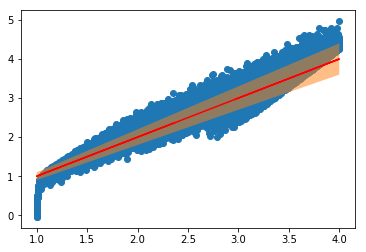

0.049881283

In [228]:
plt.scatter(batch_y, acc + batch_y)
plt.plot(batch_y, batch_y, color='r')

yyy = numpy.linspace(1, 4, 100)

plt.fill_between(yyy, 0.9*yyy , 1.1*yyy, alpha = 0.5)
plt.show()

loss

In [151]:
with tf.Session() as sess:

    saver.restore(sess, "/tmp/model.ckpt")
    sess.run([weights, biases])



INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


In [152]:
h3w = weights['h3']

In [161]:
numpy.array(h3w.read_value())

array(<tf.Tensor 'read_2:0' shape=(4, 1) dtype=float32>, dtype=object)

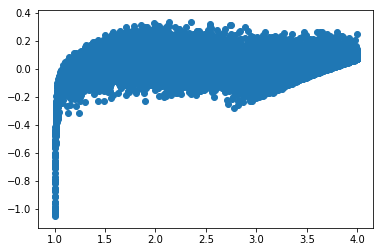

In [229]:
plt.scatter(batch_y, acc/ batch_y )
# plt.plot(batch_y, batch_y)

(array([2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 3.000e+00, 7.000e+00, 5.000e+00, 4.000e+00, 2.000e+00,
        6.000e+00, 8.000e+00, 4.000e+00, 1.100e+01, 9.000e+00, 8.000e+00,
        1.600e+01, 2.700e+01, 3.200e+01, 4.500e+01, 8.100e+01, 1.270e+02,
        1.570e+02, 2.970e+02, 4.160e+02, 5.840e+02, 8.690e+02, 1.093e+03,
        1.319e+03, 1.515e+03, 1.614e+03, 1.606e+03, 1.596e+03, 1.278e+03,
        9.930e+02, 7.400e+02, 5.820e+02, 4.360e+02, 3.330e+02, 1.920e+02,
        1.320e+02, 8.500e+01, 5.900e+01, 1.400e+01, 1.700e+01, 4.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

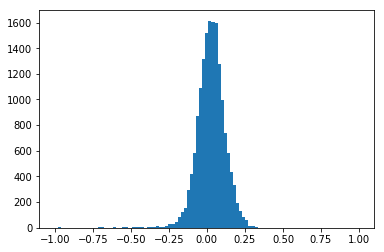

In [230]:
plt.hist(acc / batch_y, bins= numpy.linspace(-1, 1,100))

In [3]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

ValueError: Unable to import backend : tensorflow python -c "from keras import backend"

In [2]:
import tensorflow

In [1]:
from tensorflow.contrib.tensorboard.plugins import projector

In [1]:
import keras

ValueError: Unable to import backend : tensorflow python -c "from keras import backend"

In [20]:
numpy.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
_[-1]

9